## 1. From the Indiegogo (https://webrobots.io/indiegogo-dataset/) dataset you need to download at least 5 JSON (or CSV) files. Use the content of “tagline” or “title” from downloaded files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
year_2021 = pd.read_json("Indiegogo_2021-09-17T20_40_51_080Z.json",lines=True)
year_2020 = pd.read_json("Indiegogo_2020-11-13T10_41_00_593Z.json",lines=True)
year_2019 = pd.read_json("Indiegogo_2019-11-15T10_40_02_728Z.json",lines=True)
year_2018 = pd.read_json("Indiegogo_2018-11-16T10_40_36_940Z.json",lines=True)
year_2017 = pd.read_json("Indiegogo_2017-11-15T10_40_47_201Z.json",lines=True)

In [3]:
year_2021["data"][0]["tagline"]

'Scroll Down - Contribute to Research! Mold in Mattress? Outdoor Stachybotrys? DNA (ERMI) Inhibition?'

In [4]:
year_2021["data"][0]["title"]

'Mold Research Continues'

In [5]:
title = []
tagline = []
for i in range(0, 1000):
    title.append(year_2021["data"][i]["title"])
    tagline.append(year_2021["data"][i]["tagline"])
    
    title.append(year_2020["data"][i]["title"])
    tagline.append(year_2020["data"][i]["tagline"])
    
    title.append(year_2019["data"][i]["title"])
    tagline.append(year_2019["data"][i]["tagline"])
    
    title.append(year_2018["data"][i]["title"])
    tagline.append(year_2018["data"][i]["tagline"])
    
    title.append(year_2017["data"][i]["title"])
    tagline.append(year_2017["data"][i]["tagline"])
    
    

In [6]:
df = pd.DataFrame(list(zip(title, tagline)),columns =['titles', 'taglines'])
df

,titles,taglines
0,Mold Research Continues,Scroll Down - Contribute to Research! Mold in ...
1,The Scoutmother,Female-driven mob boss movie parody in the sty...
2,Geography Club - The Television Series,A television drama series based on the 2013 fe...
3,Abba.. Zappa Seventies Rock Photography: The App,"We have the book, now we need your help to pro..."
4,Liquid Death Spring Water,Murder your thirst.
...,...,...
4995,The Cleveland Candle Company,Help us bring a fresh new experience to Clevel...
4996,Gogo-S: Wireless & Waterproof Sports Earbuds,"Truewireless earbuds with music play, dynamic ..."
4997,Camp WannaTippaTrashCan Book Series,A middle-readers series about the marauding mi...
4998,SACRED,connecting people with God through music


## 2. Extract the article title from your downloaded dataset and use “bag of words” to convert all article titles into a term-document matrix (2 points).

In [7]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
import re 
stop_words = set(stopwords.words('english'))

lemmer = WordNetLemmatizer()

def prep(x):
  
    x = str(x)
    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
     
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    
    return x

df['title_clean'] = df['titles'].apply(prep)
df['tagline_clean'] = df['taglines'].apply(prep)
df.head()

,titles,taglines,title_clean,tagline_clean
0,Mold Research Continues,Scroll Down - Contribute to Research! Mold in ...,"[mold, research, continues]","[scroll, contribute, research, mold, mattress,..."
1,The Scoutmother,Female-driven mob boss movie parody in the sty...,[scoutmother],"[femaledriven, mob, bos, movie, parody, style,..."
2,Geography Club - The Television Series,A television drama series based on the 2013 fe...,"[geography, club, television, series]","[television, drama, series, based, feature, fi..."
3,Abba.. Zappa Seventies Rock Photography: The App,"We have the book, now we need your help to pro...","[abba, zappa, seventy, rock, photography, app]","[book, need, help, produce, app, black, white,..."
4,Liquid Death Spring Water,Murder your thirst.,"[liquid, death, spring, water]","[murder, thirst]"


In [8]:
df["tagline_clean"][0]

['scroll',
 'contribute',
 'research',
 'mold',
 'mattress',
 'outdoor',
 'stachybotrys',
 'dna',
 'ermi',
 'inhibition']

In [9]:
df["title_clean"][0]

['mold', 'research', 'continues']

In [10]:
import gensim
from gensim.corpora import Dictionary
word_list = []
dictionary = Dictionary(df["title_clean"])
count = 0
for i, j in dictionary.iteritems():
    word_list.append(j)
    print(i, j)
    count += 1

0 continues
1 mold
2 research
3 scoutmother
4 club
5 geography
6 series
7 television
8 abba
9 app
10 photography
11 rock
12 seventy
13 zappa
14 death
15 liquid
16 spring
17 water
18 building
19 heartcentered
20 home
21 space
22 welcome
23 yoga
24 foot
25 fund
26 ground
27 scholarship
28 aura
29 need
30 scanning
31 simplifies
32 speed
33 develop
34 medal
35 olympic
36 sculling
37 state
38 united
39 win
40 cooking
41 cylinder
42 peruvian
43 health
44 maui
45 studio
46 wellness
47 fan
48 film
49 friday
50 lost
51 th
52 bag
53 functional
54 garment
55 wrap
56 carminder
57 child
58 device
59 keep
60 safety
61 smart
62 anarkhia
63 horas
64 licores
65 critically
66 deliver
67 lebanon
68 medication
69 needed
70 float
71 king
72 pierre
73 scary
74 stuff
75 arduino
76 beast
77 power
78 solar
79 station
80 tame
81 australian
82 kiev
83 meat
84 pie
85 affirmation
86 gender
87 laith
88 real
89 spanish
90 challenger
91 god
92 neokami
93 adirondack
94 curiously
95 fun
96 join
97 actually
98 find
99 o

1456 cannabis
1457 cte
1458 july
1459 kiva
1460 uk
1461 mort
1462 petite
1463 skull
1464 im
1465 fabian
1466 mchale
1467 neutering
1468 cycling
1469 riot
1470 watt
1471 floating
1472 hoverglide
1473 fork
1474 hunger
1475 put
1476 bank
1477 halo
1478 ip
1479 chile
1480 allinone
1481 anywhere
1482 ridesafe
1483 tracking
1484 combar
1485 heavyduty
1486 incredibly
1487 multitool
1488 rugged
1489 awareness
1490 bay
1491 bike
1492 border
1493 testicular
1494 chosen
1495 rinascita
1496 deepest
1497 dive
1498 ft
1499 underwater
1500 mr
1501 slauson
1502 wisdom
1503 atomic
1504 removable
1505 sunpack
1506 color
1507 avec
1508 elodie
1509 magie
1510 paye
1511 ta
1512 diffuser
1513 flash
1514 wakelited
1515 geovilla
1516 umana
1517 pitaka
1518 nothing
1519 iapplebytes
1520 okay
1521 olivero
1522 asylum
1523 edmonton
1524 fringe
1525 dr
1526 footstep
1527 price
1528 retracing
1529 desk
1530 interactive
1531 iota
1532 lumid
1533 reliable
1534 easy
1535 hsonicthe
1536 toothbrush
1537 use
1538 doorto

2819 geminipad
2820 disrupted
2821 parking
2822 autres
2823 aux
2824 qigong
2825 utile
2826 être
2827 bushcraft
2828 ridge
2829 nosilas
2830 magnocycle
2831 riding
2832 pandastripesorg
2833 buildout
2834 spiked
2835 spin
2836 atari
2837 connect
2838 stream
2839 vcs
2840 edinburgh
2841 indulgent
2842 superballz
2843 wholly
2844 azure
2845 hookah
2846 soulside
2847 kentucky
2848 sidesaddle
2849 diverter
2850 magic
2851 sink
2852 cosmogenic
2853 megalith
2854 puma
2855 punku
2856 mail
2857 mat
2858 yellow
2859 asmr
2860 sleepphones
2861 adhesif
2862 greenbleez
2863 fishac
2864 sport
2865 cellmute
2866 driver
2867 supervise
2868 teenage
2869 ii
2870 playspace
2871 roam
2872 posing
2873 activity
2874 cheapest
2875 hype
2876 landline
2877 telecom
2878 inc
2879 fibromyalgia
2880 supportfibro
2881 technology
2882 kayak
2883 lancaster
2884 legalize
2885 marijuana
2886 texas
2887 fifteenzerofive
2888 streetwear
2889 hoffys
2890 sexual
2891 candy
2892 louisville
2893 soda
2894 ville
2895 collecti

4205 quidditch
4206 relocate
4207 formation
4208 terra
4209 handwriting
4210 simulated
4211 thank
4212 jamaica
4213 joes
4214 antibiotic
4215 recoop
4216 resistance
4217 egg
4218 protein
4219 tanzania
4220 faraj
4221 suleiman
4222 northbound
4223 notable
4224 christian
4225 communication
4226 gospel
4227 neo
4228 symbolism
4229 chowdey
4230 prisoner
4231 schild
4232 steve
4233 areef
4234 uruf
4235 الحروف
4236 حريف
4237 ross
4238 latticia
4239 shea
4240 soufflé
4241 whipped
4242 electrical
4243 underfloor
4244 yesontransrightsma
4245 litmor
4246 efa
4247 trike
4248 andino
4249 nutrishake
4250 communitycommunity
4251 petit
4252 poi
4253 tome
4254 rich
4255 osiris
4256 poor
4257 cleanse
4258 deradiate
4259 replacement
4260 snapizzi
4261 eggshell
4262 utilization
4263 brilliant
4264 contour
4265 carnie
4266 knowledge
4267 unlawful
4268 follow
4269 laguz
4270 bimoz
4271 fence
4272 urinal
4273 carlstad
4274 crusader
4275 fidget
4276 spinner
4277 toy
4278 tri
4279 dérive
4280 sociofinancement

5705 sabura
5706 hjhjhj
5707 immersive
5708 xion
5709 pipe
5710 longevity
5711 stroller
5712 sherman
5713 creamos
5714 desea
5715 empresa
5716 gente
5717 mayor
5718 que
5719 trabajar
5720 buddhist
5721 tinas
5722 irondale
5723 evergate
5724 fourlegged
5725 melancholy
5726 nettle
5727 finder
5728 consumer
5729 purchasing
5730 endangered
5731 khulan
5732 mongolian
5733 bonus
5734 clown
5735 boundary
5736 equine
5737 ezro
5738 darbeevision
5739 dimension
5740 image
5741 availability
5742 runtime
5743 binge
5744 treated
5745 broadwinged
5746 conserving
5747 hawk
5748 longdistance
5749 distributeur
5750 entonnoir
5751 airppt
5752 dopamine
5753 storytelling
5754 howler
5755 bianca
5756 burglary
5757 heyden
5758 laeremans
5759 booking
5760 bella
5761 delong
5762 earthship
5763 malawi
5764 population
5765 clockwake
5766 waker
5767 recordbreaking
5768 ace
5769 accepting
5770 hai
5771 holi
5772 taxdeductible
5773 court
5774 dimock
5775 federal
5776 adkclocks
5777 clock
5778 grows
5779 worried
57

7205 nikki
7206 douro
7207 cowboy
7208 ricochet
7209 inventor
7210 thermopower
7211 cheesemonger
7212 june
7213 prey
7214 wedrepco
7215 abroad
7216 amadáin
7217 mongol
7218 bust
7219 drawmania
7220 lexia
7221 smartband
7222 northeastern
7223 openloop
7224 diploma
7225 demise
7226 gorey
7227 cellar
7228 proteger
7229 umbraa
7230 doodle
7231 tankopedia
7232 exquisite
7233 sumahobukuro
7234 wakayama
7235 dialogue
7236 globalsay
7237 noseclip
7238 mim
7239 kvaern
7240 died
7241 finally
7242 petabyte
7243 eclectic
7244 emporium
7245 whimsicalitea
7246 zeeny
7247 kashmiri
7248 stole
7249 favorite
7250 xpress
7251 findyourtrip
7252 cairo
7253 cyclist
7254 dc
7255 housewarming
7256 housepurple
7257 purple
7258 fertilizer
7259 grower
7260 as
7261 barnhart
7262 classy
7263 keeks
7264 kiki
7265 collaboration
7266 nikosglobaltrade
7267 collab
7268 jolt
7269 sleeve
7270 truffle
7271 adventurous
7272 whiskey
7273 extinction
7274 bos
7275 evil
7276 wipe
7277 harp
7278 jaw
7279 anatomy
7280 brainwashi

In [11]:
corpus = [dictionary.doc2bow(text) for text in df["title_clean"]]
corpus[5]

[(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]

In [12]:
for i in corpus:
    bow_doc = i
    for j in range(len(bow_doc)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc[j][0], 
                                               dictionary[bow_doc[j][0]], bow_doc[j][1]))

Word 0 ("continues") appears 1 time.
Word 1 ("mold") appears 1 time.
Word 2 ("research") appears 1 time.
Word 3 ("scoutmother") appears 1 time.
Word 4 ("club") appears 1 time.
Word 5 ("geography") appears 1 time.
Word 6 ("series") appears 1 time.
Word 7 ("television") appears 1 time.
Word 8 ("abba") appears 1 time.
Word 9 ("app") appears 1 time.
Word 10 ("photography") appears 1 time.
Word 11 ("rock") appears 1 time.
Word 12 ("seventy") appears 1 time.
Word 13 ("zappa") appears 1 time.
Word 14 ("death") appears 1 time.
Word 15 ("liquid") appears 1 time.
Word 16 ("spring") appears 1 time.
Word 17 ("water") appears 1 time.
Word 18 ("building") appears 1 time.
Word 19 ("heartcentered") appears 1 time.
Word 20 ("home") appears 1 time.
Word 21 ("space") appears 1 time.
Word 22 ("welcome") appears 1 time.
Word 23 ("yoga") appears 1 time.
Word 24 ("foot") appears 1 time.
Word 25 ("fund") appears 1 time.
Word 26 ("ground") appears 1 time.
Word 27 ("scholarship") appears 1 time.
Word 28 ("aura"

Word 493 ("cross") appears 1 time.
Word 1002 ("boomerang") appears 1 time.
Word 1003 ("country") appears 1 time.
Word 1004 ("kindness") appears 1 time.
Word 1005 ("tour") appears 1 time.
Word 591 ("adventure") appears 1 time.
Word 1006 ("half") appears 1 time.
Word 1007 ("interstellar") appears 1 time.
Word 1008 ("mar") appears 1 time.
Word 1009 ("season") appears 1 time.
Word 1010 ("consumidores") appears 1 time.
Word 1011 ("diseños") appears 1 time.
Word 1012 ("los") appears 1 time.
Word 1013 ("para") appears 1 time.
Word 57 ("child") appears 1 time.
Word 854 ("skincare") appears 1 time.
Word 1014 ("honest") appears 1 time.
Word 1015 ("tiny") appears 1 time.
Word 1016 ("todd") appears 1 time.
Word 365 ("build") appears 1 time.
Word 1017 ("good") appears 1 time.
Word 1018 ("market") appears 1 time.
Word 1019 ("root") appears 1 time.
Word 1020 ("shop") appears 1 time.
Word 1021 ("waste") appears 1 time.
Word 1022 ("zero") appears 1 time.
Word 607 ("ecofriendly") appears 1 time.
Word 10

Word 256 ("help") appears 1 time.
Word 814 ("national") appears 1 time.
Word 1833 ("park") appears 1 time.
Word 1834 ("rural") appears 1 time.
Word 1835 ("visit") appears 1 time.
Word 1836 ("zimbabwean") appears 1 time.
Word 130 ("travel") appears 1 time.
Word 625 ("jacket") appears 1 time.
Word 1837 ("advnture") appears 1 time.
Word 1838 ("innovation") appears 1 time.
Word 1825 ("fa") appears 1 time.
Word 1826 ("nighthawk") appears 1 time.
Word 1827 ("o") appears 1 time.
Word 1828 ("stealth") appears 1 time.
Word 1829 ("tvdongle") appears 1 time.
Word 1830 ("xbmc") appears 1 time.
Word 1839 ("everyone") appears 1 time.
Word 1840 ("homegrowing") appears 1 time.
Word 1841 ("tomato") appears 1 time.
Word 195 ("roller") appears 1 time.
Word 256 ("help") appears 1 time.
Word 1475 ("put") appears 1 time.
Word 1842 ("denver") appears 1 time.
Word 1843 ("derby") appears 1 time.
Word 1844 ("roof") appears 1 time.
Word 150 ("electric") appears 1 time.
Word 1845 ("kuickwheel") appears 1 time.
Wo

Word 2529 ("sublime") appears 1 time.
Word 52 ("bag") appears 1 time.
Word 61 ("smart") appears 1 time.
Word 502 ("feature") appears 1 time.
Word 2013 ("cool") appears 1 time.
Word 2530 ("lumzag") appears 1 time.
Word 2531 ("packed") appears 1 time.
Word 551 ("game") appears 1 time.
Word 966 ("card") appears 1 time.
Word 1078 ("war") appears 1 time.
Word 2532 ("adult") appears 1 time.
Word 2533 ("race") appears 1 time.
Word 333 ("support") appears 1 time.
Word 462 ("center") appears 1 time.
Word 2534 ("hawaii") appears 1 time.
Word 2535 ("spiritual") appears 1 time.
Word 21 ("space") appears 1 time.
Word 305 ("kid") appears 1 time.
Word 351 ("furniture") appears 1 time.
Word 1743 ("compact") appears 1 time.
Word 2536 ("bedroom") appears 1 time.
Word 2537 ("dinky") appears 1 time.
Word 6 ("series") appears 1 time.
Word 2538 ("situationships") appears 1 time.
Word 228 ("world") appears 1 time.
Word 545 ("first") appears 1 time.
Word 1133 ("tool") appears 1 time.
Word 1617 ("keychain") ap

Word 2446 ("run") appears 1 time.
Word 2450 ("brewing") appears 1 time.
Word 3181 ("brewery") appears 1 time.
Word 46 ("wellness") appears 1 time.
Word 270 ("house") appears 1 time.
Word 1527 ("price") appears 1 time.
Word 3182 ("uganda") appears 1 time.
Word 1172 ("feed") appears 1 time.
Word 2175 ("nyc") appears 1 time.
Word 52 ("bag") appears 1 time.
Word 3183 ("ashford") appears 1 time.
Word 3184 ("kristin") appears 1 time.
Word 228 ("world") appears 1 time.
Word 356 ("charging") appears 1 time.
Word 359 ("wireless") appears 1 time.
Word 402 ("case") appears 1 time.
Word 954 ("smartphone") appears 1 time.
Word 1661 ("st") appears 1 time.
Word 220 ("best") appears 1 time.
Word 1541 ("sale") appears 1 time.
Word 3185 ("exclusive") appears 1 time.
Word 3186 ("mezcal") appears 1 time.
Word 3187 ("pre") appears 1 time.
Word 46 ("wellness") appears 1 time.
Word 163 ("journey") appears 1 time.
Word 396 ("new") appears 1 time.
Word 2211 ("revolution") appears 1 time.
Word 2234 ("transporta

Word 3775 ("caffeinated") appears 1 time.
Word 3776 ("jitterless") appears 1 time.
Word 3777 ("quokka") appears 1 time.
Word 3778 ("dungeon") appears 1 time.
Word 3779 ("sickness") appears 1 time.
Word 573 ("love") appears 1 time.
Word 3780 ("bland") appears 1 time.
Word 3781 ("cabaret") appears 1 time.
Word 3782 ("katie") appears 1 time.
Word 3783 ("show") appears 1 time.
Word 3784 ("theyre") appears 1 time.
Word 2355 ("boat") appears 1 time.
Word 3785 ("bin") appears 1 time.
Word 3786 ("garbage") appears 1 time.
Word 3787 ("rv") appears 1 time.
Word 962 ("meditation") appears 1 time.
Word 1734 ("unique") appears 1 time.
Word 2137 ("platform") appears 1 time.
Word 3788 ("guideful") appears 1 time.
Word 331 ("orphan") appears 1 time.
Word 1612 ("india") appears 1 time.
Word 1768 ("christmas") appears 1 time.
Word 2206 ("gift") appears 1 time.
Word 194 ("hand") appears 1 time.
Word 419 ("burning") appears 1 time.
Word 423 ("man") appears 1 time.
Word 721 ("art") appears 1 time.
Word 378

Word 4330 ("slowness") appears 1 time.
Word 77 ("power") appears 1 time.
Word 357 ("dock") appears 1 time.
Word 359 ("wireless") appears 1 time.
Word 875 ("magnetic") appears 1 time.
Word 1476 ("bank") appears 1 time.
Word 4331 ("wiba") appears 1 time.
Word 207 ("intelligent") appears 1 time.
Word 470 ("application") appears 1 time.
Word 592 ("business") appears 1 time.
Word 1306 ("web") appears 1 time.
Word 4332 ("bi") appears 1 time.
Word 4333 ("data") appears 1 time.
Word 3083 ("restore") appears 1 time.
Word 4334 ("vols") appears 1 time.
Word 256 ("help") appears 1 time.
Word 366 ("fall") appears 1 time.
Word 2746 ("feel") appears 1 time.
Word 3135 ("everywhere") appears 1 time.
Word 3417 ("unlimited") appears 1 time.
Word 3541 ("wifi") appears 1 time.
Word 4335 ("mercurio") appears 1 time.
Word 102 ("place") appears 1 time.
Word 683 ("dream") appears 1 time.
Word 2043 ("work") appears 1 time.
Word 2660 ("lab") appears 1 time.
Word 2897 ("boston") appears 1 time.
Word 4336 ("yume")

Word 175 ("way") appears 1 time.
Word 396 ("new") appears 1 time.
Word 4849 ("pan") appears 1 time.
Word 4850 ("upside") appears 1 time.
Word 225 ("innovative") appears 1 time.
Word 351 ("furniture") appears 1 time.
Word 4851 ("pallet") appears 1 time.
Word 396 ("new") appears 1 time.
Word 535 ("healing") appears 1 time.
Word 2797 ("spirit") appears 1 time.
Word 4852 ("zealand") appears 1 time.
Word 677 ("spread") appears 1 time.
Word 988 ("knife") appears 1 time.
Word 3011 ("heated") appears 1 time.
Word 4853 ("butter") appears 1 time.
Word 476 ("body") appears 1 time.
Word 1032 ("book") appears 1 time.
Word 2912 ("artist") appears 1 time.
Word 4854 ("transmaterial") appears 1 time.
Word 61 ("smart") appears 1 time.
Word 164 ("air") appears 1 time.
Word 856 ("natural") appears 1 time.
Word 2986 ("amazing") appears 1 time.
Word 4855 ("natede") appears 1 time.
Word 4856 ("purifier") appears 1 time.
Word 389 ("de") appears 1 time.
Word 1398 ("curso") appears 1 time.
Word 2526 ("final") a

Word 5363 ("solargaps") appears 1 time.
Word 504 ("every") appears 1 time.
Word 2512 ("childrens") appears 1 time.
Word 2676 ("baby") appears 2 time.
Word 3905 ("hospital") appears 1 time.
Word 5356 ("onesie") appears 1 time.
Word 5357 ("sick") appears 1 time.
Word 83 ("meat") appears 1 time.
Word 272 ("people") appears 1 time.
Word 5364 ("biologic") appears 1 time.
Word 1506 ("color") appears 1 time.
Word 4706 ("bible") appears 1 time.
Word 5365 ("many") appears 1 time.
Word 716 ("accessory") appears 1 time.
Word 822 ("fantasy") appears 1 time.
Word 824 ("rpg") appears 1 time.
Word 2467 ("temple") appears 1 time.
Word 3413 ("tabletop") appears 1 time.
Word 5366 ("ratmen") appears 1 time.
Word 721 ("art") appears 2 time.
Word 2814 ("guide") appears 1 time.
Word 5367 ("pdx") appears 1 time.
Word 6 ("series") appears 1 time.
Word 58 ("device") appears 1 time.
Word 201 ("fire") appears 1 time.
Word 234 ("mobile") appears 1 time.
Word 258 ("project") appears 1 time.
Word 1105 ("wild") appe

Word 3195 ("boost") appears 1 time.
Word 5852 ("gratuity") appears 1 time.
Word 390 ("en") appears 1 time.
Word 790 ("la") appears 1 time.
Word 5853 ("historias") appears 1 time.
Word 5854 ("viajando") appears 1 time.
Word 139 ("bus") appears 1 time.
Word 234 ("mobile") appears 1 time.
Word 834 ("clinic") appears 1 time.
Word 881 ("botanical") appears 1 time.
Word 1272 ("herb") appears 1 time.
Word 5855 ("bilingual") appears 1 time.
Word 853 ("organic") appears 1 time.
Word 2299 ("dont") appears 1 time.
Word 3785 ("bin") appears 1 time.
Word 5856 ("compost") appears 1 time.
Word 5857 ("harvester") appears 1 time.
Word 721 ("art") appears 1 time.
Word 1194 ("present") appears 1 time.
Word 5858 ("rehappening") appears 1 time.
Word 5859 ("windrose") appears 1 time.
Word 1021 ("waste") appears 1 time.
Word 5637 ("prague") appears 2 time.
Word 5860 ("convergence") appears 1 time.
Word 5861 ("cspa") appears 1 time.
Word 5862 ("quadrennial") appears 1 time.
Word 5863 ("reduce") appears 1 time

Word 1088 ("horror") appears 1 time.
Word 2745 ("drop") appears 1 time.
Word 6014 ("bear") appears 1 time.
Word 6299 ("aussie") appears 1 time.
Word 6300 ("dramatic") appears 1 time.
Word 931 ("movie") appears 1 time.
Word 1785 ("night") appears 1 time.
Word 61 ("smart") appears 1 time.
Word 164 ("air") appears 1 time.
Word 341 ("iphone") appears 1 time.
Word 6301 ("beautiful") appears 1 time.
Word 6302 ("marvelcase") appears 1 time.
Word 228 ("world") appears 1 time.
Word 6303 ("bodylove") appears 1 time.
Word 6304 ("jimena") appears 1 time.
Word 1160 ("set") appears 1 time.
Word 1750 ("flosser") appears 1 time.
Word 6305 ("dental") appears 1 time.
Word 6306 ("lessmore") appears 1 time.
Word 530 ("campaign") appears 1 time.
Word 1980 ("production") appears 1 time.
Word 6307 ("accessibility") appears 1 time.
Word 6308 ("vertigo") appears 1 time.
Word 931 ("movie") appears 1 time.
Word 1785 ("night") appears 1 time.
Word 61 ("smart") appears 1 time.
Word 6309 ("effie") appears 1 time.
W

Word 833 ("care") appears 1 time.
Word 982 ("self") appears 1 time.
Word 3246 ("college") appears 1 time.
Word 285 ("system") appears 1 time.
Word 1289 ("justice") appears 1 time.
Word 2959 ("peace") appears 1 time.
Word 5126 ("sustainability") appears 1 time.
Word 6771 ("seeing") appears 1 time.
Word 293 ("mountain") appears 1 time.
Word 1491 ("bike") appears 1 time.
Word 6772 ("alliance") appears 1 time.
Word 6773 ("evergreen") appears 1 time.
Word 6774 ("excavator") appears 1 time.
Word 3505 ("mc") appears 1 time.
Word 67 ("lebanon") appears 1 time.
Word 2660 ("lab") appears 1 time.
Word 3670 ("coworking") appears 1 time.
Word 6775 ("tangent") appears 1 time.
Word 139 ("bus") appears 1 time.
Word 323 ("vibe") appears 1 time.
Word 1017 ("good") appears 1 time.
Word 6776 ("cuddle") appears 1 time.
Word 6777 ("shuttle") appears 1 time.
Word 150 ("electric") appears 1 time.
Word 982 ("self") appears 1 time.
Word 2285 ("w") appears 1 time.
Word 6742 ("balancing") appears 1 time.
Word 677

Word 6872 ("wandering") appears 1 time.
Word 7211 ("cheesemonger") appears 1 time.
Word 573 ("love") appears 1 time.
Word 1114 ("meet") appears 1 time.
Word 1980 ("production") appears 1 time.
Word 7212 ("june") appears 1 time.
Word 7213 ("prey") appears 1 time.
Word 7214 ("wedrepco") appears 1 time.
Word 1301 ("blue") appears 1 time.
Word 2294 ("hope") appears 1 time.
Word 1023 ("blanket") appears 1 time.
Word 2818 ("pocket") appears 1 time.
Word 2378 ("rally") appears 1 time.
Word 7215 ("abroad") appears 1 time.
Word 7216 ("amadáin") appears 1 time.
Word 7217 ("mongol") appears 1 time.
Word 139 ("bus") appears 1 time.
Word 688 ("eco") appears 1 time.
Word 7218 ("bust") appears 1 time.
Word 117 ("free") appears 1 time.
Word 385 ("program") appears 1 time.
Word 711 ("brother") appears 1 time.
Word 899 ("men") appears 1 time.
Word 2166 ("arm") appears 1 time.
Word 2167 ("biabbl") appears 1 time.
Word 1195 ("two") appears 1 time.
Word 7219 ("drawmania") appears 1 time.
Word 502 ("feature

Word 88 ("real") appears 1 time.
Word 215 ("life") appears 1 time.
Word 7617 ("ironman") appears 1 time.
Word 7618 ("suit") appears 1 time.
Word 256 ("help") appears 1 time.
Word 302 ("u") appears 1 time.
Word 2417 ("heal") appears 1 time.
Word 4843 ("someone") appears 1 time.
Word 7619 ("hurting") appears 1 time.
Word 7620 ("who") appears 1 time.
Word 396 ("new") appears 1 time.
Word 1833 ("park") appears 1 time.
Word 3273 ("orleans") appears 1 time.
Word 4345 ("picnic") appears 1 time.
Word 7621 ("audubon") appears 1 time.
Word 201 ("fire") appears 1 time.
Word 1393 ("citizen") appears 1 time.
Word 4669 ("colorado") appears 1 time.
Word 7622 ("brigade") appears 1 time.
Word 3460 ("print") appears 1 time.
Word 5916 ("wagon") appears 1 time.
Word 930 ("lock") appears 1 time.
Word 7623 ("griff") appears 1 time.
Word 1266 ("making") appears 1 time.
Word 2043 ("work") appears 1 time.
Word 7624 ("intellorus") appears 1 time.
Word 7625 ("workplace") appears 1 time.
Word 7626 ("austintypes")

Word 1616 ("holder") appears 1 time.
Word 4053 ("drink") appears 1 time.
Word 7269 ("sleeve") appears 1 time.
Word 8035 ("ago") appears 1 time.
Word 596 ("palestine") appears 1 time.
Word 925 ("farm") appears 1 time.
Word 1273 ("mushroom") appears 1 time.
Word 1661 ("st") appears 1 time.
Word 3267 ("story") appears 1 time.
Word 8036 ("amoro") appears 1 time.
Word 1120 ("edition") appears 1 time.
Word 2859 ("asmr") appears 1 time.
Word 2860 ("sleepphones") appears 1 time.
Word 256 ("help") appears 1 time.
Word 302 ("u") appears 1 time.
Word 360 ("cause") appears 1 time.
Word 7941 ("catalan") appears 1 time.
Word 8037 ("internationalize") appears 1 time.
Word 281 ("sound") appears 1 time.
Word 8038 ("kamili") appears 1 time.
Word 221 ("box") appears 1 time.
Word 235 ("service") appears 1 time.
Word 5045 ("subscription") appears 1 time.
Word 8039 ("mable") appears 1 time.
Word 8040 ("marsalis") appears 1 time.
Word 8041 ("monthly") appears 1 time.
Word 568 ("little") appears 1 time.
Word 

## 3. Apply TF/IDF on the term-document matrix and Use LSA and LDA to cluster the result of the Term-Document matrix (5 points). 

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

docs = df["titles"]
cv = CountVectorizer()
word_count_vector = cv.fit_transform(docs)
term_doc_matrix = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names_out())
term_doc_matrix = term_doc_matrix[term_doc_matrix.columns.intersection(word_list)]
term_doc_matrix

,aa,aadarsh,aamjiwnaang,aap,aaron,abago,abandonded,abandoned,abba,abbey,...,реконструкція,секции,сцена,форум,харбър,чтению,японию,الحروف,حريف,ザヤードニセコ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)
idf = pd.DataFrame({'feature_name':cv.get_feature_names_out(), 'idf_weights':tfidf_transformer.idf_})
tf_idf = pd.DataFrame(X.toarray() ,columns=cv.get_feature_names_out())
tf_idf = tf_idf[tf_idf.columns.intersection(word_list)]
tf_idf

,aa,aadarsh,aamjiwnaang,aap,aaron,abago,abandonded,abandoned,abba,abbey,...,реконструкція,секции,сцена,форум,харбър,чтению,японию,الحروف,حريف,ザヤードニセコ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.468827,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
tf = []
for i in corpus:
    bow_doc = i
    for j in range(len(bow_doc)):
        tf.append(bow_doc[j][1] / len(bow_doc))
tf

[0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.25,
 0.25,
 0.25,
 0.25,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.25,
 0.25,
 0.25,
 0.25,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.25,
 0.25,
 0.25,
 0.25,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.25,
 0.25,
 0.25,
 0.25,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.5,
 0.25,
 0.25,
 0.25,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.3333333333333333,
 0.33

In [16]:
tfm = df["title_clean"].apply(lambda x: pd.Series(x).value_counts()).fillna(0)   
tfm = tfm[tfm.columns.intersection(word_list)]
tfm

/var/folders/wj/4psym4l52gzbg9swfsnj2vzm0000gn/T/ipykernel_54598/2672701423.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tfm = df["title_clean"].apply(lambda x: pd.Series(x).value_counts()).fillna(0)


,aa,aadarsh,aamjiwnaang,aap,aaron,ab,abago,abandonded,abandoned,abba,...,секции,сцена,форум,харбър,чтению,японию,الحروف,حريف,ⅱ,ザヤードニセコ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
idf = pd.Series([np.log((float(df.shape[0])+1)/(len([x for x in df["title_clean"].values if token in x])+1))+1 
                 for token in tfm.columns])
idf.index = tfm.columns
idf

aa             8.824246
aadarsh        8.824246
aamjiwnaang    8.824246
aap            8.824246
aaron          8.824246
                 ...   
японию         8.824246
الحروف         8.824246
حريف           8.824246
ⅱ              8.824246
ザヤードニセコ        8.824246
Length: 8056, dtype: float64

In [18]:
tfidf = tfm.copy()
for col in tfidf.columns:
    tfidf[col] = tfidf[col]*idf[col]

In [19]:
sqrt_vec = np.sqrt(tfidf.pow(2).sum(axis=1))
tfidf.div(sqrt_vec, axis=0)

,aa,aadarsh,aamjiwnaang,aap,aaron,ab,abago,abandonded,abandoned,abba,...,секции,сцена,форум,харбър,чтению,японию,الحروف,حريف,ⅱ,ザヤードニセコ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Find the optimal number of topics for LDA

from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def find_Opt_lda(corpus, dictionary, i):
    lda = LdaModel(corpus, 
               id2word=dictionary, 
               num_topics=i, 
               random_state=64, 
               iterations=100,
               passes=5,
               per_word_topics=False)
    cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    return i, coherence

lda_scores = [find_Opt_lda(corpus, dictionary, i) for i in range(1, 30)]

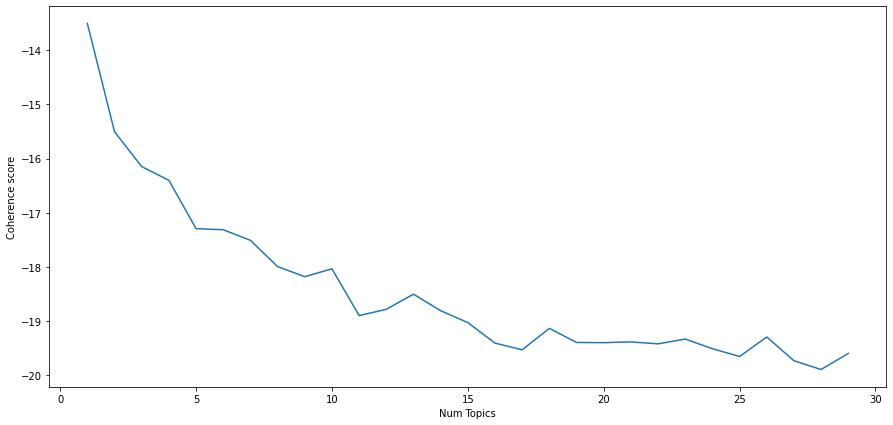

In [21]:
x = [cs[0] for cs in lda_scores]
y = [cs[1] for cs in lda_scores]
plt.figure(figsize=(15,7))
plt.plot(x,y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [22]:
lda_model = LdaModel(corpus, num_topics=17, id2word = dictionary, passes=20, random_state = 64)

In [23]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.050*"first" + 0.028*"world" + 0.024*"kid" + 0.023*"album" + 0.012*"heart" + 0.011*"small" + 0.011*"service" + 0.009*"part" + 0.009*"bus" + 0.009*"new"'), (1, '0.028*"power" + 0.023*"phone" + 0.016*"speaker" + 0.016*"bluetooth" + 0.011*"old" + 0.011*"personal" + 0.009*"africa" + 0.009*"bank" + 0.009*"place" + 0.009*"human"'), (2, '0.026*"music" + 0.025*"bike" + 0.020*"box" + 0.020*"electric" + 0.019*"series" + 0.017*"make" + 0.016*"video" + 0.013*"care" + 0.012*"craft" + 0.011*"healthy"'), (3, '0.021*"get" + 0.018*"tour" + 0.018*"international" + 0.017*"camera" + 0.016*"novel" + 0.015*"charger" + 0.015*"w" + 0.015*"baby" + 0.013*"day" + 0.013*"graphic"'), (4, '0.042*"film" + 0.022*"bag" + 0.018*"community" + 0.018*"short" + 0.016*"way" + 0.016*"comic" + 0.015*"feature" + 0.012*"road" + 0.011*"comedy" + 0.011*"time"'), (5, '0.028*"solar" + 0.020*"studio" + 0.016*"love" + 0.016*"healing" + 0.015*"yoga" + 0.013*"photo" + 0.013*"medical" + 0.011*"powered" + 0.011*"vegan" + 0.011*"mi

In [24]:
for index, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(index, topic))

Topic: 0 
Words: 0.050*"first" + 0.028*"world" + 0.024*"kid" + 0.023*"album" + 0.012*"heart" + 0.011*"small" + 0.011*"service" + 0.009*"part" + 0.009*"bus" + 0.009*"new"
Topic: 1 
Words: 0.028*"power" + 0.023*"phone" + 0.016*"speaker" + 0.016*"bluetooth" + 0.011*"old" + 0.011*"personal" + 0.009*"africa" + 0.009*"bank" + 0.009*"place" + 0.009*"human"
Topic: 2 
Words: 0.026*"music" + 0.025*"bike" + 0.020*"box" + 0.020*"electric" + 0.019*"series" + 0.017*"make" + 0.016*"video" + 0.013*"care" + 0.012*"craft" + 0.011*"healthy"
Topic: 3 
Words: 0.021*"get" + 0.018*"tour" + 0.018*"international" + 0.017*"camera" + 0.016*"novel" + 0.015*"charger" + 0.015*"w" + 0.015*"baby" + 0.013*"day" + 0.013*"graphic"
Topic: 4 
Words: 0.042*"film" + 0.022*"bag" + 0.018*"community" + 0.018*"short" + 0.016*"way" + 0.016*"comic" + 0.015*"feature" + 0.012*"road" + 0.011*"comedy" + 0.011*"time"
Topic: 5 
Words: 0.028*"solar" + 0.020*"studio" + 0.016*"love" + 0.016*"healing" + 0.015*"yoga" + 0.013*"photo" + 0.013

In [25]:
from gensim.models import LsiModel as LSI
lsi_model = LSI(corpus, id2word=dictionary, num_topics=17)  

In [26]:
for index, topic in lsi_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(index, topic))

Topic: 0 
Words: 0.937*"help" + 0.200*"u" + 0.073*"fund" + 0.069*"new" + 0.068*"need" + 0.067*"world" + 0.064*"get" + 0.063*"build" + 0.062*"support" + 0.061*"save"
Topic: 1 
Words: 0.891*"world" + 0.294*"first" + 0.131*"new" + -0.103*"help" + 0.085*"smart" + 0.076*"book" + 0.069*"camera" + 0.064*"app" + 0.059*"wireless" + 0.056*"solar"
Topic: 2 
Words: -0.939*"new" + 0.147*"world" + -0.083*"game" + 0.080*"help" + -0.076*"album" + 0.065*"first" + -0.063*"support" + -0.060*"project" + -0.060*"product" + -0.049*"life"
Topic: 3 
Words: 0.936*"project" + -0.097*"new" + 0.097*"yoga" + 0.089*"app" + 0.086*"fund" + 0.072*"solar" + 0.066*"mobile" + 0.056*"need" + 0.053*"community" + -0.049*"world"
Topic: 4 
Words: -0.738*"first" + 0.319*"world" + -0.305*"app" + -0.304*"smart" + 0.135*"book" + 0.102*"project" + -0.093*"water" + -0.086*"mobile" + -0.071*"home" + -0.063*"bag"
Topic: 5 
Words: 0.672*"game" + 0.459*"app" + -0.231*"first" + 0.197*"mobile" + 0.138*"card" + 0.135*"life" + 0.132*"board

## 4. Visualize the article clustering results, in a dendrogram or heatmap (3 points).

/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1440x504 with 0 Axes>

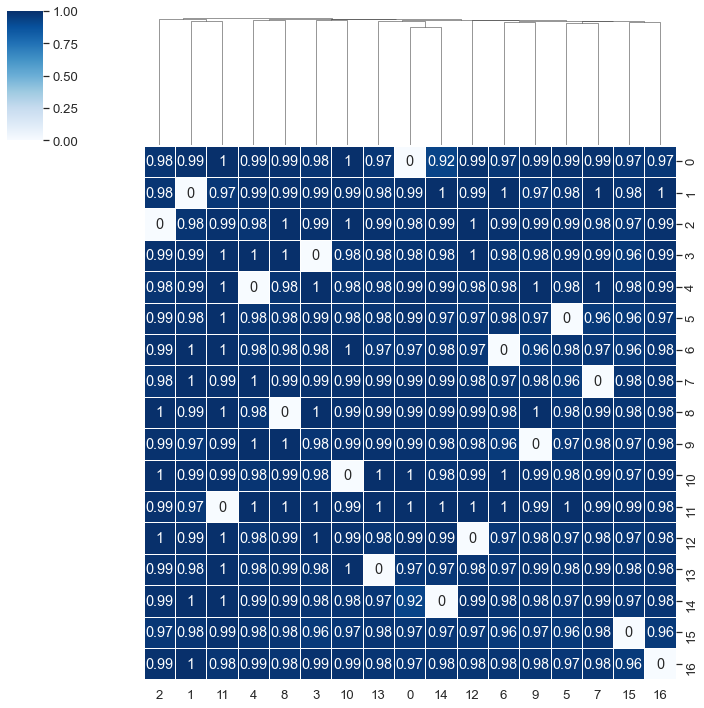

In [27]:
mdiff, annotation = lda_model.diff(lda_model, distance='jaccard', num_words=50)

plt.figure(figsize=(20,7))
sns.set(font_scale=1.2)
sns.clustermap(mdiff,annot=True,linewidths=.5, cmap ='Blues',row_cluster=False )
plt.show()

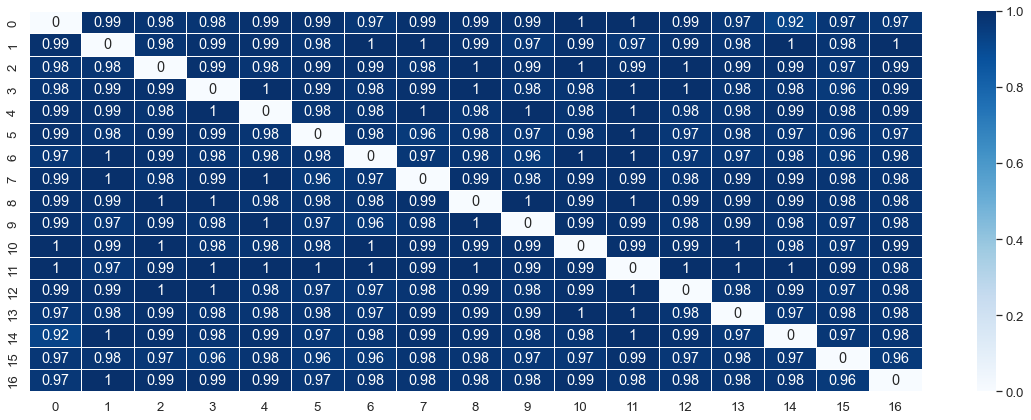

In [28]:
mdiff, annotation = lda_model.diff(lda_model, distance='jaccard', num_words=50)
plt.figure(figsize=(20,7))
sns.set(font_scale=1.2)
sns.heatmap(mdiff,annot=True,linewidths=.5, cmap ='Blues' )
plt.show()

In [29]:
def create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [30]:
def create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix

In [31]:
def create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [32]:
def create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [33]:
def create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [34]:
import math

from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords  

In [41]:
def main(sentences):
    freq_matrix = create_frequency_matrix(sentences)
    tf_matrix = create_tf_matrix(freq_matrix)
    count_doc_per_words = create_documents_per_words(freq_matrix)
    idf_matrix = create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
    tf_idf_matrix = create_tf_idf_matrix(tf_matrix, idf_matrix)
    
    print("########### tf_matrix ###########\n",tf_matrix)
    print("########### idf_matrix ###########\n",idf_matrix)
    print("########### tf_idf_matrix ###########\n\n",tf_idf_matrix)

In [42]:
for i in df["titles"]:
    text = i
    sentences = sent_tokenize(text)
    total_documents = len(sentences)
    main(sentences)

########### tf_matrix ###########
 {'Mold Research C': {'mold': 0.3333333333333333, 'research': 0.3333333333333333, 'continu': 0.3333333333333333}}
########### idf_matrix ###########
 {'Mold Research C': {'mold': 0.0, 'research': 0.0, 'continu': 0.0}}
########### tf_idf_matrix ###########

 {'Mold Research C': {'mold': 0.0, 'research': 0.0, 'continu': 0.0}}
########### tf_matrix ###########
 {'The Scoutmother': {'scoutmoth': 1.0}}
########### idf_matrix ###########
 {'The Scoutmother': {'scoutmoth': 0.0}}
########### tf_idf_matrix ###########

 {'The Scoutmother': {'scoutmoth': 0.0}}
########### tf_matrix ###########
 {'Geography Club ': {'geographi': 0.2, 'club': 0.2, '-': 0.2, 'televis': 0.2, 'seri': 0.2}}
########### idf_matrix ###########
 {'Geography Club ': {'geographi': 0.0, 'club': 0.0, '-': 0.0, 'televis': 0.0, 'seri': 0.0}}
########### tf_idf_matrix ###########

 {'Geography Club ': {'geographi': 0.0, 'club': 0.0, '-': 0.0, 'televis': 0.0, 'seri': 0.0}}
########### tf_matrix 

 {'Continental Sta': {'continent': 0.0, 'standard': 0.0, ':': 0.0, 'power': 0.0, 'fit': 0.0}}
########### tf_idf_matrix ###########

 {'Continental Sta': {'continent': 0.0, 'standard': 0.0, ':': 0.0, 'power': 0.0, 'fit': 0.0}}
########### tf_matrix ###########
 {'DAPA': {'dapa': 1.0}}
########### idf_matrix ###########
 {'DAPA': {'dapa': 0.0}}
########### tf_idf_matrix ###########

 {'DAPA': {'dapa': 0.0}}
########### tf_matrix ###########
 {'Asociación Proy': {'asociación': 0.3333333333333333, 'proyecto': 0.3333333333333333, 'peruano': 0.3333333333333333}}
########### idf_matrix ###########
 {'Asociación Proy': {'asociación': 0.0, 'proyecto': 0.0, 'peruano': 0.0}}
########### tf_idf_matrix ###########

 {'Asociación Proy': {'asociación': 0.0, 'proyecto': 0.0, 'peruano': 0.0}}
########### tf_matrix ###########
 {'Franchise D.R.A': {'franchis': 0.3333333333333333, 'd.r.a.f.t': 0.3333333333333333, '.': 0.3333333333333333}, 'PLAYOFFS 2017': {'playoff': 0.5, '2017': 0.5}}
########### idf_m

########### tf_idf_matrix ###########

 {'Independent Wri': {'independ': 0.0, 'write-in': 0.0, 'us': 0.0, 'presidenti': 0.0, 'campaign': 0.0}}
########### tf_matrix ###########
 {'A Bridge for Co': {'bridg': 0.3333333333333333, 'colonia': 0.3333333333333333, 'dora': 0.3333333333333333}}
########### idf_matrix ###########
 {'A Bridge for Co': {'bridg': 0.0, 'colonia': 0.0, 'dora': 0.0}}
########### tf_idf_matrix ###########

 {'A Bridge for Co': {'bridg': 0.0, 'colonia': 0.0, 'dora': 0.0}}
########### tf_matrix ###########
 {'JOTM: Unique af': {'jotm': 0.16666666666666666, ':': 0.16666666666666666, 'uniqu': 0.16666666666666666, 'afford': 0.16666666666666666, 'moonphas': 0.16666666666666666, 'watch': 0.16666666666666666}}
########### idf_matrix ###########
 {'JOTM: Unique af': {'jotm': 0.0, ':': 0.0, 'uniqu': 0.0, 'afford': 0.0, 'moonphas': 0.0, 'watch': 0.0}}
########### tf_idf_matrix ###########

 {'JOTM: Unique af': {'jotm': 0.0, ':': 0.0, 'uniqu': 0.0, 'afford': 0.0, 'moonphas': 0.0,

 {'YOGA BLOOM PROJ': {'yoga': 0.0, 'bloom': 0.0, 'project': 0.0}}
########### tf_matrix ###########
 {'Help us heal he': {'help': 0.14285714285714285, 'us': 0.14285714285714285, 'heal': 0.14285714285714285, 'heart': 0.14285714285714285, 'mind': 0.14285714285714285, 'africa': 0.14285714285714285, '!': 0.14285714285714285}}
########### idf_matrix ###########
 {'Help us heal he': {'help': 0.0, 'us': 0.0, 'heal': 0.0, 'heart': 0.0, 'mind': 0.0, 'africa': 0.0, '!': 0.0}}
########### tf_idf_matrix ###########

 {'Help us heal he': {'help': 0.0, 'us': 0.0, 'heal': 0.0, 'heart': 0.0, 'mind': 0.0, 'africa': 0.0, '!': 0.0}}
########### tf_matrix ###########
 {'Trataron d Ente': {'trataron': 0.16666666666666666, 'enterrarno': 0.16666666666666666, 'sabían': 0.16666666666666666, 'q': 0.16666666666666666, 'eramo': 0.16666666666666666, 'semilla': 0.16666666666666666}}
########### idf_matrix ###########
 {'Trataron d Ente': {'trataron': 0.0, 'enterrarno': 0.0, 'sabían': 0.0, 'q': 0.0, 'eramo': 0.0, 's

 {"Let's Build a S": {'let': 0.14285714285714285, "'s": 0.14285714285714285, 'build': 0.14285714285714285, 'social': 0.14285714285714285, 'give': 0.14285714285714285, 'revolut': 0.14285714285714285, 'togeth': 0.14285714285714285}}
########### idf_matrix ###########
 {"Let's Build a S": {'let': 0.0, "'s": 0.0, 'build': 0.0, 'social': 0.0, 'give': 0.0, 'revolut': 0.0, 'togeth': 0.0}}
########### tf_idf_matrix ###########

 {"Let's Build a S": {'let': 0.0, "'s": 0.0, 'build': 0.0, 'social': 0.0, 'give': 0.0, 'revolut': 0.0, 'togeth': 0.0}}
########### tf_matrix ###########
 {'Best boat tours': {'best': 0.125, 'boat': 0.125, 'tour': 0.125, 'port': 0.125, 'grimaud': 0.125, '-': 0.125, 'french': 0.125, 'venic': 0.125}}
########### idf_matrix ###########
 {'Best boat tours': {'best': 0.0, 'boat': 0.0, 'tour': 0.0, 'port': 0.0, 'grimaud': 0.0, '-': 0.0, 'french': 0.0, 'venic': 0.0}}
########### tf_idf_matrix ###########

 {'Best boat tours': {'best': 0.0, 'boat': 0.0, 'tour': 0.0, 'port': 0.0,

 {'The Dream of an': {'dream': 0.0, 'artist': 0.0}}
########### tf_idf_matrix ###########

 {'The Dream of an': {'dream': 0.0, 'artist': 0.0}}
########### tf_matrix ###########
 {'We Built This C': {'built': 0.3333333333333333, 'thi': 0.3333333333333333, 'cheesecak': 0.3333333333333333}}
########### idf_matrix ###########
 {'We Built This C': {'built': 0.0, 'thi': 0.0, 'cheesecak': 0.0}}
########### tf_idf_matrix ###########

 {'We Built This C': {'built': 0.0, 'thi': 0.0, 'cheesecak': 0.0}}
########### tf_matrix ###########
 {'Fund Cutting Ed': {'fund': 0.1, 'cut': 0.1, 'edg': 0.1, 'research-': 0.1, 'natur': 0.1, 'approach': 0.1, 'prevent': 0.1, 'breast': 0.1, 'cancer': 0.1, '.': 0.1}}
########### idf_matrix ###########
 {'Fund Cutting Ed': {'fund': 0.0, 'cut': 0.0, 'edg': 0.0, 'research-': 0.0, 'natur': 0.0, 'approach': 0.0, 'prevent': 0.0, 'breast': 0.0, 'cancer': 0.0, '.': 0.0}}
########### tf_idf_matrix ###########

 {'Fund Cutting Ed': {'fund': 0.0, 'cut': 0.0, 'edg': 0.0, 'resea

########### tf_idf_matrix ###########

 {'smart fone glas': {'smart': 0.0, 'fone': 0.0, 'glass': 0.0, 'protector': 0.0, 'eye': 0.0}}
########### tf_matrix ###########
 {'Soul Survivor H': {'soul': 0.2, 'survivor': 0.2, 'heal': 0.2, 'kemet': 0.2, 'yoga': 0.2}}
########### idf_matrix ###########
 {'Soul Survivor H': {'soul': 0.0, 'survivor': 0.0, 'heal': 0.0, 'kemet': 0.0, 'yoga': 0.0}}
########### tf_idf_matrix ###########

 {'Soul Survivor H': {'soul': 0.0, 'survivor': 0.0, 'heal': 0.0, 'kemet': 0.0, 'yoga': 0.0}}
########### tf_matrix ###########
 {'Luminook: Big l': {'luminook': 0.16666666666666666, ':': 0.16666666666666666, 'big': 0.16666666666666666, 'light': 0.16666666666666666, 'small': 0.16666666666666666, 'space': 0.16666666666666666}}
########### idf_matrix ###########
 {'Luminook: Big l': {'luminook': 0.0, ':': 0.0, 'big': 0.0, 'light': 0.0, 'small': 0.0, 'space': 0.0}}
########### tf_idf_matrix ###########

 {'Luminook: Big l': {'luminook': 0.0, ':': 0.0, 'big': 0.0, 'light'

 {'Magic Mountain ': {'magic': 0.0, 'mountain': 0.0, 'viennes': 0.0}}
########### tf_matrix ###########
 {'Winging It!': {'wing': 0.5, '!': 0.5}, 'Vision & Art fr': {'vision': 0.25, '&': 0.25, 'art': 0.25, 'heart': 0.25}}
########### idf_matrix ###########
 {'Winging It!': {'wing': 0.3010299956639812, '!': 0.3010299956639812}, 'Vision & Art fr': {'vision': 0.3010299956639812, '&': 0.3010299956639812, 'art': 0.3010299956639812, 'heart': 0.3010299956639812}}
########### tf_idf_matrix ###########

 {'Winging It!': {'wing': 0.1505149978319906, '!': 0.1505149978319906}, 'Vision & Art fr': {'vision': 0.0752574989159953, '&': 0.0752574989159953, 'art': 0.0752574989159953, 'heart': 0.0752574989159953}}
########### tf_matrix ###########
 {'Better speakers': {'better': 0.25, 'speaker': 0.25, 'mic': 0.25, '.': 0.25}}
########### idf_matrix ###########
 {'Better speakers': {'better': 0.0, 'speaker': 0.0, 'mic': 0.0, '.': 0.0}}
########### tf_idf_matrix ###########

 {'Better speakers': {'better': 

 {'GRASSROOTS HERI': {'grassroot': 0.16666666666666666, 'heritag': 0.16666666666666666, '-': 0.16666666666666666, 'taiwan': 0.16666666666666666, 'cemeteri': 0.16666666666666666, 'book': 0.16666666666666666}}
########### idf_matrix ###########
 {'GRASSROOTS HERI': {'grassroot': 0.0, 'heritag': 0.0, '-': 0.0, 'taiwan': 0.0, 'cemeteri': 0.0, 'book': 0.0}}
########### tf_idf_matrix ###########

 {'GRASSROOTS HERI': {'grassroot': 0.0, 'heritag': 0.0, '-': 0.0, 'taiwan': 0.0, 'cemeteri': 0.0, 'book': 0.0}}
########### tf_matrix ###########
 {'DUO Camera Plat': {'duo': 0.14285714285714285, 'camera': 0.14285714285714285, 'plate': 0.14285714285714285, ',': 0.14285714285714285, 'sling': 0.14285714285714285, 'strap': 0.2857142857142857, 'hand': 0.14285714285714285}}
########### idf_matrix ###########
 {'DUO Camera Plat': {'duo': 0.0, 'camera': 0.0, 'plate': 0.0, ',': 0.0, 'sling': 0.0, 'strap': 0.0, 'hand': 0.0}}
########### tf_idf_matrix ###########

 {'DUO Camera Plat': {'duo': 0.0, 'camera': 0

 {'Manufacture of ': {'manufactur': 0.0, 'headdress': 0.0, 'stimul': 0.0, 'hair': 0.0, 'growth': 0.0}}
########### tf_idf_matrix ###########

 {'Manufacture of ': {'manufactur': 0.0, 'headdress': 0.0, 'stimul': 0.0, 'hair': 0.0, 'growth': 0.0}}
########### tf_matrix ###########
 {'Moment Pebble -': {'moment': 0.14285714285714285, 'pebbl': 0.14285714285714285, '-': 0.14285714285714285, 'new': 0.14285714285714285, 'tool': 0.14285714285714285, 'modern': 0.14285714285714285, 'mind': 0.14285714285714285}}
########### idf_matrix ###########
 {'Moment Pebble -': {'moment': 0.0, 'pebbl': 0.0, '-': 0.0, 'new': 0.0, 'tool': 0.0, 'modern': 0.0, 'mind': 0.0}}
########### tf_idf_matrix ###########

 {'Moment Pebble -': {'moment': 0.0, 'pebbl': 0.0, '-': 0.0, 'new': 0.0, 'tool': 0.0, 'modern': 0.0, 'mind': 0.0}}
########### tf_matrix ###########
 {'Juanpool: Journ': {'juanpool': 0.1111111111111111, ':': 0.1111111111111111, 'journey': 0.1111111111111111, 'juan': 0.1111111111111111, '-': 0.11111111111

########### tf_idf_matrix ###########

 {'R-Go Break Ergo': {'r-go': 0.0, 'break': 0.0, 'ergonom': 0.0, 'mous': 0.0}}
########### tf_matrix ###########
 {'The Teddy Bear ': {'teddi': 0.14285714285714285, 'bear': 0.14285714285714285, 'defend': 0.14285714285714285, 'monster': 0.14285714285714285, 'bed': 0.14285714285714285, 'miniatur': 0.14285714285714285, 'set': 0.14285714285714285}}
########### idf_matrix ###########
 {'The Teddy Bear ': {'teddi': 0.0, 'bear': 0.0, 'defend': 0.0, 'monster': 0.0, 'bed': 0.0, 'miniatur': 0.0, 'set': 0.0}}
########### tf_idf_matrix ###########

 {'The Teddy Bear ': {'teddi': 0.0, 'bear': 0.0, 'defend': 0.0, 'monster': 0.0, 'bed': 0.0, 'miniatur': 0.0, 'set': 0.0}}
########### tf_matrix ###########
 {'BIO COCOA BEURR': {'bio': 0.3333333333333333, 'cocoa': 0.3333333333333333, 'beurr': 0.3333333333333333}}
########### idf_matrix ###########
 {'BIO COCOA BEURR': {'bio': 0.0, 'cocoa': 0.0, 'beurr': 0.0}}
########### tf_idf_matrix ###########

 {'BIO COCOA BEUR

########### tf_matrix ###########
 {'We Deliver Food': {'deliv': 0.3333333333333333, 'food': 0.3333333333333333, '.': 0.3333333333333333}, 'On Bikes!': {'bike': 0.5, '!': 0.5}, 'We are Food Ped': {'food': 0.3333333333333333, 'pedal': 0.3333333333333333, '.': 0.3333333333333333}}
########### idf_matrix ###########
 {'We Deliver Food': {'deliv': 0.47712125471966244, 'food': 0.17609125905568124, '.': 0.17609125905568124}, 'On Bikes!': {'bike': 0.47712125471966244, '!': 0.47712125471966244}, 'We are Food Ped': {'food': 0.17609125905568124, 'pedal': 0.47712125471966244, '.': 0.17609125905568124}}
########### tf_idf_matrix ###########

 {'We Deliver Food': {'deliv': 0.15904041823988746, 'food': 0.058697086351893746, '.': 0.058697086351893746}, 'On Bikes!': {'bike': 0.23856062735983122, '!': 0.23856062735983122}, 'We are Food Ped': {'food': 0.058697086351893746, 'pedal': 0.15904041823988746, '.': 0.058697086351893746}}
########### tf_matrix ###########
 {'Help me Carpe D': {'help': 0.25, 'car

########### tf_matrix ###########
 {'uStream True Wi': {'ustream': 0.16666666666666666, 'true': 0.16666666666666666, 'wireless': 0.16666666666666666, 'stereo': 0.16666666666666666, 'bluetooth': 0.16666666666666666, 'speaker': 0.16666666666666666}}
########### idf_matrix ###########
 {'uStream True Wi': {'ustream': 0.0, 'true': 0.0, 'wireless': 0.0, 'stereo': 0.0, 'bluetooth': 0.0, 'speaker': 0.0}}
########### tf_idf_matrix ###########

 {'uStream True Wi': {'ustream': 0.0, 'true': 0.0, 'wireless': 0.0, 'stereo': 0.0, 'bluetooth': 0.0, 'speaker': 0.0}}
########### tf_matrix ###########
 {'Ace The Face - ': {'ace': 0.2, 'face': 0.2, '-': 0.2, 'card': 0.2, 'game': 0.2}}
########### idf_matrix ###########
 {'Ace The Face - ': {'ace': 0.0, 'face': 0.0, '-': 0.0, 'card': 0.0, 'game': 0.0}}
########### tf_idf_matrix ###########

 {'Ace The Face - ': {'ace': 0.0, 'face': 0.0, '-': 0.0, 'card': 0.0, 'game': 0.0}}
########### tf_matrix ###########
 {'xxx': {'xxx': 1.0}}
########### idf_matrix ##

 {'Baja Rally Mexi': {'baja': 0.16666666666666666, 'ralli': 0.16666666666666666, 'mexico': 0.16666666666666666, 'onli': 0.16666666666666666, 'indian': 0.16666666666666666, 'photograph': 0.16666666666666666}}
########### idf_matrix ###########
 {'Baja Rally Mexi': {'baja': 0.0, 'ralli': 0.0, 'mexico': 0.0, 'onli': 0.0, 'indian': 0.0, 'photograph': 0.0}}
########### tf_idf_matrix ###########

 {'Baja Rally Mexi': {'baja': 0.0, 'ralli': 0.0, 'mexico': 0.0, 'onli': 0.0, 'indian': 0.0, 'photograph': 0.0}}
########### tf_matrix ###########
 {'My Mom is a Sex': {'mom': 0.14285714285714285, 'sex': 0.14285714285714285, 'therapist': 0.14285714285714285, '-': 0.14285714285714285, 'origin': 0.14285714285714285, 'one-woman': 0.14285714285714285, 'music': 0.14285714285714285}}
########### idf_matrix ###########
 {'My Mom is a Sex': {'mom': 0.0, 'sex': 0.0, 'therapist': 0.0, '-': 0.0, 'origin': 0.0, 'one-woman': 0.0, 'music': 0.0}}
########### tf_idf_matrix ###########

 {'My Mom is a Sex': {'mom': 0

########### tf_matrix ###########
 {'Gulfstar Corpor': {'gulfstar': 0.25, 'corpor': 0.25, 'model': 0.25, 'expans': 0.25}}
########### idf_matrix ###########
 {'Gulfstar Corpor': {'gulfstar': 0.0, 'corpor': 0.0, 'model': 0.0, 'expans': 0.0}}
########### tf_idf_matrix ###########

 {'Gulfstar Corpor': {'gulfstar': 0.0, 'corpor': 0.0, 'model': 0.0, 'expans': 0.0}}
########### tf_matrix ###########
 {'Savage Sasquana': {'savag': 0.16666666666666666, 'sasquanaut': 0.16666666666666666, '#': 0.16666666666666666, '1': 0.16666666666666666, '-': 0.16666666666666666, '4': 0.16666666666666666}}
########### idf_matrix ###########
 {'Savage Sasquana': {'savag': 0.0, 'sasquanaut': 0.0, '#': 0.0, '1': 0.0, '-': 0.0, '4': 0.0}}
########### tf_idf_matrix ###########

 {'Savage Sasquana': {'savag': 0.0, 'sasquanaut': 0.0, '#': 0.0, '1': 0.0, '-': 0.0, '4': 0.0}}
########### tf_matrix ###########
 {'Scorpion': {'scorpion': 1.0}}
########### idf_matrix ###########
 {'Scorpion': {'scorpion': 0.0}}
#########